# Projet LEYENDA
## Livrable 1 - Classification Binaire

# 1-Importation des bibliothèques
On va regrouper ici l'ensemble des bibliothèques que nous allons utiliser dans ce nootbook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import zipfile

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from keras.src.layers.preprocessing.image_preprocessing import HORIZONTAL_AND_VERTICAL
from keras.src.layers.preprocessing.image_preprocessing import RandomFlip
from keras.src.layers.preprocessing.image_preprocessing import RandomRotation
from keras.src.layers.preprocessing.image_preprocessing import RandomZoom
from keras import Sequential

2023-10-09 11:48:00.265586: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-09 11:48:00.265630: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-09 11:48:00.266609: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-09 11:48:00.421909: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 2-Préparation des images
#### Dézip des fichiers

In [2]:
repertoire = './DataL1'
dossier_dataset = './Data'
if not os.path.exists(dossier_dataset):
    os.makedirs(dossier_dataset)
    
for fichier in os.listdir(repertoire):
    chemin_fichier = os.path.join(repertoire,fichier)
    if zipfile.is_zipfile(chemin_fichier):
        with zipfile.ZipFile(chemin_fichier, 'r') as zip_ref:
            zip_ref.extractall(dossier_dataset)
            print(f'Fichier {fichier} décompressé dans le dossier Dataset.')
print('Tous les fichiers ZIP ont été décompressés dans le dossier Dataset')

Fichier Dataset Livrable 1 - Text.zip décompressé dans le dossier Dataset.
Fichier Dataset Livrable 1 - Photo.zip décompressé dans le dossier Dataset.
Fichier Dataset Livrable 1 - Sketch.zip décompressé dans le dossier Dataset.
Fichier Dataset Livrable 1 - Schematics.zip décompressé dans le dossier Dataset.
Fichier Dataset Livrable 1 - Painting.zip décompressé dans le dossier Dataset.
Tous les fichiers ZIP ont été décompressés dans le dossier Dataset


## Suppression des images corrompues

In [4]:
dataset_folder = dossier_dataset
print("Début de la vérification des images avec TensorFlow...")
for subdir, _, files in os.walk(dataset_folder):
    for file in files:
        file_path = os.path.join(subdir, file)
        try:
            # Tenter de charger et décoder l'image avec TensorFlow
            img = tf.io.read_file(file_path)
            img = tf.image.decode_image(img)
        except Exception as e:
            print(f"Image {file_path} is invalid for TensorFlow. Exception: {e}")
            try:
                os.remove(file_path)
                print(f"Removed: {file_path}")
            except Exception as e_rm:
                print(f"Error removing {file_path}. Exception: {e_rm}")

print("Vérification des images terminée.")

Début de la vérification des images avec TensorFlow...


2023-10-09 11:55:29.857152: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-09 11:55:29.909813: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-09 11:55:29.909859: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-09 11:55:29.916948: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-09 11:55:29.916993: I tensorflow/compile

Image ./Data/Schematics/desktop.ini is invalid for TensorFlow. Exception: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] name: 
Removed: ./Data/Schematics/desktop.ini


2023-10-09 11:56:34.121256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


Image ./Data/Painting/painting_02662.jpg is invalid for TensorFlow. Exception: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input size should match (header_size + row_size * abs_height) but they differ by 2 [Op:DecodeImage] name: 
Removed: ./Data/Painting/painting_02662.jpg
Vérification des images terminée.


#### Emplacement du dataset
On spécifie ensuite l'emplacement du dataset et on met en place la variable data_dir.

In [5]:
datapath = dossier_dataset
data_dir = pathlib.Path(datapath)

### Création des Set
Pour commencer, on spécifie quelques paramètres pour l'apprentissage :
<ul>
    <li>La longueur et la largeur des images. </li>
    <li>La taille du batch.</li>
</ul>
On crée maintenant nos deux sets, un d'entraînement (80% des data) et un de test (20% des data).

In [6]:
image_h = 180
image_w = 180
batch_s = 32

In [7]:
# Le train_set
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=  0.2,
    subset =  "training",
    seed=42,
    image_size=(image_h, image_w),
    batch_size=batch_s
)
# Le test_set
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=  0.2,
    subset =  "validation",
    seed=42,
    image_size=(image_h, image_w),
    batch_size=batch_s
)

Found 41398 files belonging to 5 classes.
Using 33119 files for training.
Found 41398 files belonging to 5 classes.
Using 8279 files for validation.


On en profite pour vérifier que les labels ont bien été trouvés :

In [8]:
class_names = train_set.class_names
print(class_names)

['Painting', 'Photo', 'Schematics', 'Sketch', 'Text']


# 3 - Coup d'œil sur nos données
On peut affichage une des images du set d'entraînements, aux dimensions spécifiées dans les paramètres :

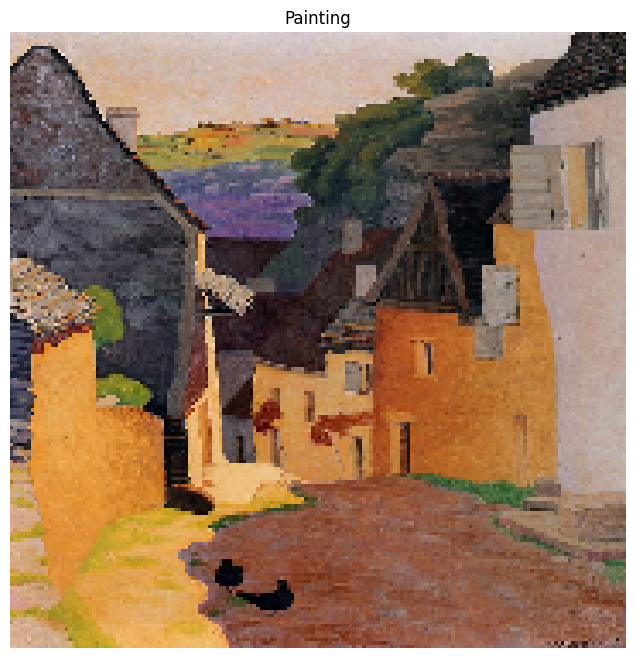

In [9]:
plt.figure(figsize=(8, 8))
for images, labels in train_set.take(1):
    for i in range(9):
        ax =  plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

Il est maintenant temps de configurer notre environnement pour passer au vif du sujet.

# 3. Configuration de l'environnement pour l'entrainement
Dans cette partie, vous devrez utiliser les fonctions [`Dataset.cache`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#cache) et [`Dataset.prefetch`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) afin de configurer les données pour améliorer les performances de la façon suivante :
- `Dataset.cache()` : Cette fonction sert à forcer le maintien des données en cache dans la mémoire. Vu que le réseau de neurones fait plusieurs passes (qu'on nomme _époque_ ou _epoch_ en anglais) sur les données durant l'apprentissage, cette fonction permet de ne pas avoir à recharger les images à chaque fois. 
- `Dataset.prefetch()` : Cette fonction permet de faire le prétraitement de l'élément courant du jeu de données (par exemple le batch suivant) en même temps que l'entrainement/évaluation du batch courant par le modèle. Dans un environnement multi-processeurs ou multi-cœur, c'est un gain de temps non négligeable.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_set = test_set.cache().prefetch(buffer_size=AUTOTUNE)

## Techniques de régularisation
Les techniques de régularisation sont les techniques qui visent à réduire le surapprentissage. L’objectif est d’éviter que le réseau de neurones mémorise le jeu de données en s’ajustant bêtement sur les particularités du jeu d’entrainement. Il s’agit globalement de réduire les degrés de liberté du réseau de neurones.

Les techniques de régularisation sont les techniques qui visent à réduire le surapprentissage. L’objectif est d’éviter que le réseau de neurones mémorise le jeu de données en s’ajustant bêtement sur les particularités du jeu d’entrainement. Il s’agit globalement de réduire les degrés de liberté du réseau de neurones. Dans le cadre de ce wokrshop nous verrons deux techniques de régularisation :
-	**L’augmentation des données** : Avoir plus de données est toujours bon pour réduire le surapprentissage, d’où l’augmentation des données. Le principe et de rajouter de nouvelles images en effectuant des transformations sur le jeu d’entrainement d’origine. Ces nouvelles images sont obtenues par des transformation affines, ou généralement par des transformations réalistes qui ne change pas la nature du label affectée à l’image. Cette technique est très efficace car les réseaux de neurones sont très gourmands en données.
-	**La technique de dropout** : Cette technique consiste à désactiver, à chaque traitement, les neurones d’une couche dense du réseau de manière aléatoire. Le dropout dépend d’un paramètre qui représente la probabilité de désactivation des neurones de la couche. Cette probabilité est le la proportion moyenne de neurones actives dans la couche durant les itérations de l’entrainement. Elle permet de réduire la complexité du réseau de neurones pour réduire le surapprentissage.

In [11]:
data_augmentation = Sequential(
    [
        RandomFlip(
            mode=HORIZONTAL_AND_VERTICAL,
            input_shape=(image_h, image_w, 3)),
        RandomRotation(
            factor=0.18,
            fill_mode='reflect',
            interpolation='bilinear',
            seed=None,
            fill_value=0.0),
        RandomZoom(
            height_factor=0.1,
            width_factor=None,
            fill_mode='reflect',
            interpolation='bilinear',
            seed=None,
            fill_value=0.0)
    ]
)

# 4. Réalisation d'un modèle CNN
On commence par crée la variable num_classes, elle sera égale au nombre de label que nous avons et sera utilisé pour déterminer le nombre de neurones sur la dernière couche.

In [12]:
num_classes = 5 # Nombre de classes et donc aussi nombre de neurones dans la dernière couche

On crée ensuite notre modèle en y implémentant l'ensemble des couches que nous souhaitons y intégrer :
Un bloc convolutif contenant 16 filtres de hauteur et de largeur 3 avec une couche de Pooling.
- Un bloc convolutif similaire au précédent contenant 32 filtres de hauteur et de largeur de 3.
- Un bloc convolutif similaire au précédent contenant 64 filtres de hauteur et de largeur de 3.
- Une couche de DropOut
- Une couche contenant la couche précédente aplatie (flatten).
- Une couche entièrement connectée de taille 128.
- La couche finale complètement connectée (dense) retournant le résultat de la classification.

On peut ensuite compiler le modèle.

In [13]:
# Le modèle
epochs = 8
complete_model =  Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    data_augmentation,
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes) # 5 dans notre cas
])
complete_model.build((None, image_h, image_w, 3))
# Compilation du modèle
complete_model.compile(optimizer =  'adam',
                       loss =  tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                       metrics=['accuracy'])
# Résumé du modèle
complete_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        18496     
                                                      

## Entrainement du modèle
Maintenant que l'on dispose d'un modèle, on va pouvoir l'entraîner puis tester le modèle avec notre jeu de test.

Epoch 1/8


2023-10-09 11:59:44.230210: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-10-09 11:59:54.434420: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:17: Filling up shuffle buffer (this may take a while): 133 of 1000
2023-10-09 12:00:04.586355: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:17: Filling up shuffle buffer (this may take a while): 262 of 1000
2023-10-09 12:00:24.457553: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:17: Filling up shuffle buffer (this may take a while): 516 of 1000
Corrupt JPEG data: 419 extraneous bytes before marker 0xd9
2023-10-09 12:00:44.543732: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:17: Filling up shuffle buffer (this may take a while): 758 o

1035/1035 [==============================] - 386s 275ms/step - loss: 0.8232 - accuracy: 0.7064 - val_loss: 0.6152 - val_accuracy: 0.7639
Epoch 2/8
1035/1035 [==============================] - 383s 370ms/step - loss: 0.5121 - accuracy: 0.7896 - val_loss: 3.1517 - val_accuracy: 0.5735
Epoch 3/8
1035/1035 [==============================] - 347s 335ms/step - loss: 0.4663 - accuracy: 0.8089 - val_loss: 0.6914 - val_accuracy: 0.7652
Epoch 4/8
1035/1035 [==============================] - 360s 348ms/step - loss: 0.4059 - accuracy: 0.8389 - val_loss: 0.9515 - val_accuracy: 0.7617
Epoch 5/8
1035/1035 [==============================] - 381s 368ms/step - loss: 0.3866 - accuracy: 0.8471 - val_loss: 0.7126 - val_accuracy: 0.7910
Epoch 6/8
1035/1035 [==============================] - 378s 366ms/step - loss: 0.3522 - accuracy: 0.8617 - val_loss: 0.5718 - val_accuracy: 0.8087
Epoch 7/8
1035/1035 [==============================] - 383s 371ms/step - loss: 0.3529 - accuracy: 0.8615 - val_loss: 0.7487 - va

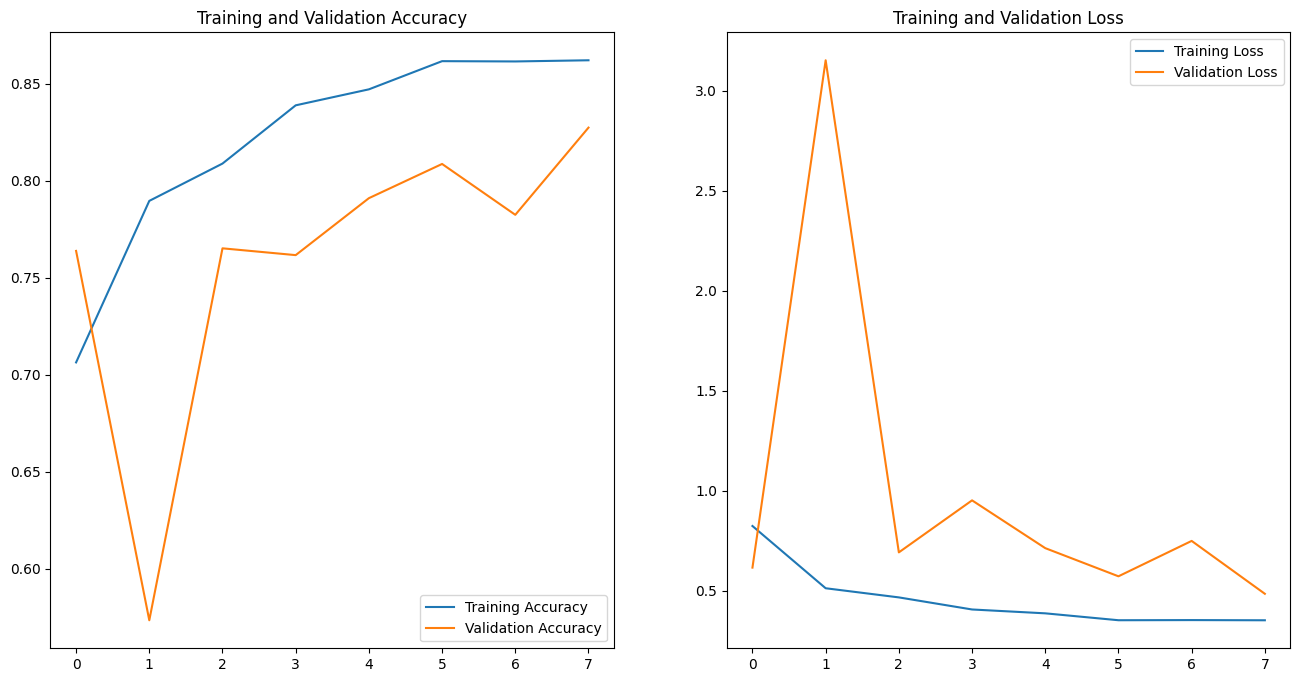

In [14]:
# Entrainement du modèle
modele1 =  complete_model.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs
)
acc = modele1.modele1['accuracy']
val_acc = modele1.modele1['val_accuracy']

loss = modele1.modele1['loss']
val_loss = modele1.modele1['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 6. Amélioration du modèle
On a un premier modèle avec une loss de 0.35 et une accuracy de 0.86. Ces résultats ne sont pas si mal, mais on va maintenant essayer de les améliorer en modifiant le modèle actuel.

## Deuxième modèle

In [15]:
# Le modèle
epochs = 10
complete_model2 =  Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    data_augmentation,
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes) # 5 dans notre cas
])
complete_model2.build((None, image_h, image_w, 3))
# Compilation du modèle
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # On utiliser un taux d'apprentissage adaptatif 
complete_model2.compile(optimizer =  'adam',
                       loss =  tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                       metrics=['accuracy'])
# Résumé du modèle
complete_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 64)        18496     
                                                      

In [16]:
# Entrainement du modèle
modele2 =  complete_model2.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs
)
acc = modele2.modele2['accuracy']
val_acc = modele2.modele2['val_accuracy']

loss = modele2.modele2['loss']
val_loss = modele2.modele2['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/10


2023-10-09 13:27:14.220371: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1035/1035 [==============================] - 443s 424ms/step - loss: 0.7993 - accuracy: 0.6906 - val_loss: 0.6261 - val_accuracy: 0.7403
Epoch 2/10
1035/1035 [==============================] - 445s 430ms/step - loss: 0.5054 - accuracy: 0.7895 - val_loss: 0.6047 - val_accuracy: 0.7668
Epoch 3/10
1035/1035 [==============================] - 410s 397ms/step - loss: 0.4530 - accuracy: 0.8158 - val_loss: 0.5608 - val_accuracy: 0.7823
Epoch 4/10
1035/1035 [==============================] - 418s 404ms/step - loss: 0.4031 - accuracy: 0.8378 - val_loss: 0.4815 - val_accuracy: 0.8203
Epoch 5/10
1035/1035 [==============================] - 415s 401ms/step - loss: 0.3993 - accuracy: 0.8391 - val_loss: 0.4636 - val_accuracy: 0.8276
Epoch 6/10
1035/1035 [==============================] - 432s 417ms/step - loss: 0.3577 - accuracy: 0.8562 - val_loss: 0.4763 - val_accuracy: 0.8221
Epoch 7/10
1035/1035 [==============================] - 397s 384ms/step - loss: 0.3474 - accuracy: 0.8614 - val_loss: 0.672

AttributeError: 'History' object has no attribute 'modele2'

In [17]:
# Le modèle
epochs = 1
complete_model3 =  Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    data_augmentation,
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes) # 5 dans notre cas
])
complete_model3.build((None, image_h, image_w, 3))
# Compilation du modèle
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # On utiliser un taux d'apprentissage adaptatif 
complete_model3.compile(optimizer =  'adam',
                        loss =  tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                        metrics=['accuracy'])
# Résumé du modèle
complete_model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 conv2d_8 (Conv2D)           (None, 90, 90, 64)        18496     
                                                      

In [18]:
# Entrainement du modèle
modele3 =  complete_model2.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs
)
acc = modele3.history['accuracy']
val_acc = modele3.history['val_accuracy']

loss = modele3.history['loss']
val_loss = modele3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2023-10-09 14:49:53.024013: W tensorflow/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 506.25MiB (rounded to 530842112)requested by op 
2023-10-09 14:49:53.028354: I tensorflow/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2023-10-09 14:49:53.029536: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 111, Chunks in use: 110. 27.8KiB allocated for chunks. 27.5KiB in use in bin. 3.7KiB client-requested in use in bin.
2023-10-09 14:49:53.029792: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 9, Chunks in use: 8. 4.8KiB allocated for chunks. 4.0KiB in use in bin. 4.0KiB client-requested in use in bin.
2023-10-09 14:49:53.029799: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (1024): 	Total Chunks: 5, Chunks in use: 5. 8.2KiB allocated for chunks. 8.2KiB in use in bin. 7.8KiB client-requested in use in bin.
2023-10-09 14:49:53.029804: I tensorflow/tsl/framewor

ResourceExhaustedError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_6 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/ipykernel_launcher.py", line 17, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 1046, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 736, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 604, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_7682/2525735693.py", line 2, in <module>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1783, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1377, in train_function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1360, in step_function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1349, in run_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1130, in train_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

Out of memory while trying to allocate 530841860 bytes.
BufferAssignment OOM Debugging.
BufferAssignment stats:
             parameter allocation: 1012.50MiB
              constant allocation:         0B
        maybe_live_out allocation:  759.38MiB
     preallocated temp allocation:  506.25MiB
  preallocated temp fragmentation:       124B (0.00%)
                 total allocation:    1.48GiB
Peak buffers:
	Buffer 1:
		Size: 253.12MiB
		XLA Label: fusion
		Shape: f32[518400,128]
		==========================

	Buffer 2:
		Size: 253.12MiB
		XLA Label: fusion
		Shape: f32[518400,128]
		==========================

	Buffer 3:
		Size: 253.12MiB
		Operator: op_name="XLA_Args"
		Entry Parameter Subshape: f32[518400,128]
		==========================

	Buffer 4:
		Size: 253.12MiB
		Operator: op_name="XLA_Args"
		Entry Parameter Subshape: f32[518400,128]
		==========================

	Buffer 5:
		Size: 253.12MiB
		Operator: op_name="XLA_Args"
		Entry Parameter Subshape: f32[518400,128]
		==========================

	Buffer 6:
		Size: 253.12MiB
		Operator: op_name="XLA_Args"
		Entry Parameter Subshape: f32[518400,128]
		==========================

	Buffer 7:
		Size: 24B
		Operator: op_type="AssignSubVariableOp" op_name="AssignSubVariableOp" source_file="/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py" source_line=1161
		XLA Label: fusion
		Shape: (f32[518400,128], f32[518400,128], f32[518400,128])
		==========================

	Buffer 8:
		Size: 16B
		XLA Label: fusion
		Shape: (f32[518400,128], f32[518400,128])
		==========================

	Buffer 9:
		Size: 8B
		Operator: op_name="XLA_Args"
		Entry Parameter Subshape: s64[]
		==========================

	Buffer 10:
		Size: 4B
		Operator: op_type="Pow" op_name="Pow_1" source_file="/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py" source_line=1161
		XLA Label: fusion
		Shape: f32[]
		==========================

	Buffer 11:
		Size: 4B
		Operator: op_type="Pow" op_name="Pow" source_file="/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py" source_line=1161
		XLA Label: fusion
		Shape: f32[]
		==========================

	Buffer 12:
		Size: 4B
		Operator: op_name="XLA_Args"
		Entry Parameter Subshape: f32[]
		==========================


	 [[{{node Adam/StatefulPartitionedCall_6}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_171197]